<a href="https://colab.research.google.com/github/dayeong918/pdm011/blob/main/py-tensorflow/tf2_4_mnist_FCN_test_ALL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## DNN (Deep Neural Networks) 구현 방법
> - Sequential model
> - Functional model
> - Subclassing model

# **Test of mnist FCN model**
## Sequential model
- FCN2
- FCN3
- FCN4
- FCN5

***

![mnist_NN_2_layers](https://raw.githubusercontent.com/Redwoods/Py/master/pdm2020/my-note/py-tensorflow/images/mnist_NN_2_layers.png)

In [4]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt
# %matplotlib inline

print(tf.__version__)

2.6.0


## **데이터 로딩, 정규화**

In [1]:
from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train, X_test = X_train/255.0, X_test/255.0 # 정규화

print("X_train={0}".format(X_train.shape))
print("y_train={0}".format(y_train.shape)) 
print("X_test={0}".format(X_test.shape))
print("y_test={0}".format(y_test.shape))

11501568/11490434 [==============================] - 0s 0us/step
X_train=(60000, 28, 28)
y_train=(60000,)
X_test=(10000, 28, 28)
y_test=(10000,)


In [2]:
# One-Hot-Encoding
# Use function to_categorical() to do One-Hot-Encoding
# tf.keras.utils.to_categorical
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

## **FCN2**

In [3]:
# Set random number seed here!
np.random.seed(1234)
tf.random.set_seed(1234)

fcn2 = keras.models.Sequential([ 
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),  
    keras.layers.Dropout(0.25), 
    keras.layers.Dense(10, activation='softmax')
])

fcn2.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy']) 

NameError: ignored

In [ ]:
fcn2.summary()

In [ ]:
fcn2.fit(X_train, y_train, 
         epochs = 20,  
         batch_size = 100,
         validation_data=(X_test, y_test))

In [ ]:
fcn2.evaluate(X_test, y_test, batch_size =100)

## **FCN3**

In [5]:
# Set random number seed here!
np.random.seed(1234)
tf.random.set_seed(1234)

fcn3 = tf.keras.models.Sequential([ 
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(256, activation='relu'),  
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(128, activation='relu'),  
    tf.keras.layers.Dropout(0.25), 
    tf.keras.layers.Dense(10, activation='softmax')
])

fcn3.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy']) 

In [6]:
fcn3.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
__________________________________________________

In [7]:
fcn3.fit(X_train,y_train, epochs= 20 , batch_size =100,
         validation_data=(X_test, y_test))

Epoch 1/20
600/600 [==============================] - 5s 4ms/step - loss: 0.3505 - accuracy: 0.8954 - val_loss: 0.1300 - val_accuracy: 0.9596
Epoch 2/20
600/600 [==============================] - 2s 4ms/step - loss: 0.1499 - accuracy: 0.9549 - val_loss: 0.0963 - val_accuracy: 0.9698
Epoch 3/20
600/600 [==============================] - 2s 4ms/step - loss: 0.1112 - accuracy: 0.9666 - val_loss: 0.0768 - val_accuracy: 0.9757
Epoch 4/20
600/600 [==============================] - 2s 4ms/step - loss: 0.0887 - accuracy: 0.9732 - val_loss: 0.0750 - val_accuracy: 0.9766
Epoch 5/20
600/600 [==============================] - 2s 4ms/step - loss: 0.0764 - accuracy: 0.9758 - val_loss: 0.0709 - val_accuracy: 0.9773
Epoch 6/20
600/600 [==============================] - 2s 4ms/step - loss: 0.0669 - accuracy: 0.9787 - val_loss: 0.0604 - val_accuracy: 0.9815
Epoch 7/20
600/600 [==============================] - 2s 4ms/step - loss: 0.0592 - accuracy: 0.9805 - val_loss: 0.0650 - val_accuracy: 0.9799
Epoch 

In [8]:
fcn3.evaluate(X_test, y_test, batch_size= 100)

100/100 [==============================] - 0s 3ms/step - loss: 0.0609 - accuracy: 0.9846


[0.06088050454854965, 0.9846000075340271]

## **FCN4**

In [9]:
# Set random number seed here!
np.random.seed(1234)
tf.random.set_seed(1234)

fcn4 = tf.keras.models.Sequential([ 
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(256, activation='relu'),  
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(128, activation='relu'),  
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(64, activation='relu'),  
    tf.keras.layers.Dropout(0.25), 
    tf.keras.layers.Dense(10, activation='softmax')
])

fcn4.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy']) 

In [10]:
fcn4.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)               200960    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_4 (Dropout)          (None, 64)               

In [11]:
fcn4.fit(X_train, y_train, epochs = 20 , batch_size =100,
         validation_data=(X_test, y_test))

Epoch 1/20
600/600 [==============================] - 3s 4ms/step - loss: 0.4134 - accuracy: 0.8760 - val_loss: 0.1413 - val_accuracy: 0.9571
Epoch 2/20
600/600 [==============================] - 2s 4ms/step - loss: 0.1768 - accuracy: 0.9496 - val_loss: 0.1044 - val_accuracy: 0.9671
Epoch 3/20
600/600 [==============================] - 2s 4ms/step - loss: 0.1304 - accuracy: 0.9627 - val_loss: 0.0895 - val_accuracy: 0.9721
Epoch 4/20
600/600 [==============================] - 3s 4ms/step - loss: 0.1111 - accuracy: 0.9673 - val_loss: 0.0781 - val_accuracy: 0.9757
Epoch 5/20
600/600 [==============================] - 3s 4ms/step - loss: 0.0945 - accuracy: 0.9731 - val_loss: 0.0807 - val_accuracy: 0.9763
Epoch 6/20
600/600 [==============================] - 2s 4ms/step - loss: 0.0830 - accuracy: 0.9758 - val_loss: 0.0703 - val_accuracy: 0.9799
Epoch 7/20
600/600 [==============================] - 3s 4ms/step - loss: 0.0733 - accuracy: 0.9781 - val_loss: 0.0713 - val_accuracy: 0.9790
Epoch 

In [12]:
fcn4.evaluate(X_test, y_test, batch_size =100)

100/100 [==============================] - 0s 2ms/step - loss: 0.0762 - accuracy: 0.9821


[0.07618226855993271, 0.9821000099182129]

## **FCN5**

In [13]:
# Set random number seed here!
np.random.seed(1234)
tf.random.set_seed(1234)

fcn5 = tf.keras.models.Sequential([ 
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(256, activation='relu'), 
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(128, activation='relu'),  
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(64, activation='relu'),  
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(32, activation='relu'),  
    tf.keras.layers.Dropout(0.25), 
    tf.keras.layers.Dense(10, activation='softmax')
])

fcn5.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy']) 

In [14]:
fcn5.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 256)               200960    
_________________________________________________________________
dropout_5 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_6 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_7 (Dropout)          (None, 64)               

In [16]:
fcn5.fit(X_train, y_train, epochs=20, batch_size =100,
         validation_data=(X_test, y_test))

Epoch 1/20
600/600 [==============================] - 3s 5ms/step - loss: 0.5933 - accuracy: 0.8191 - val_loss: 0.1700 - val_accuracy: 0.9510
Epoch 2/20
600/600 [==============================] - 3s 4ms/step - loss: 0.2305 - accuracy: 0.9403 - val_loss: 0.1199 - val_accuracy: 0.9667
Epoch 3/20
600/600 [==============================] - 3s 4ms/step - loss: 0.1787 - accuracy: 0.9550 - val_loss: 0.1070 - val_accuracy: 0.9706
Epoch 4/20
600/600 [==============================] - 3s 5ms/step - loss: 0.1476 - accuracy: 0.9623 - val_loss: 0.0943 - val_accuracy: 0.9743
Epoch 5/20
600/600 [==============================] - 3s 4ms/step - loss: 0.1298 - accuracy: 0.9678 - val_loss: 0.0945 - val_accuracy: 0.9742
Epoch 6/20
600/600 [==============================] - 3s 4ms/step - loss: 0.1082 - accuracy: 0.9718 - val_loss: 0.0928 - val_accuracy: 0.9762
Epoch 7/20
600/600 [==============================] - 3s 4ms/step - loss: 0.1017 - accuracy: 0.9730 - val_loss: 0.0786 - val_accuracy: 0.9776
Epoch 

In [ ]:
fcn5.evaluate(X_test, y_test, batch_size = 100)

# **[DIY] Hidden layer에 따른 정확도**

In [20]:
fcn2.evaluate(X_test, y_test, batch_size = 100)
fcn3.evaluate(X_test, y_test, batch_size = 100)
fcn4.evaluate(X_test, y_test, batch_size = 100)
fcn5.evaluate(X_test, y_test, batch_size = 100)

NameError: ignored

In [21]:
fcn_result = [[0.0674, 0.9806], 
 [0.07000, 0.9828], 
 [0.0738, 0.9814], 
 [0.0868, 0.9818]]

In [22]:
# select accuracies
accuracy = [row[1] for row in fcn_result]
accuracy

[0.9806, 0.9828, 0.9814, 0.9818]

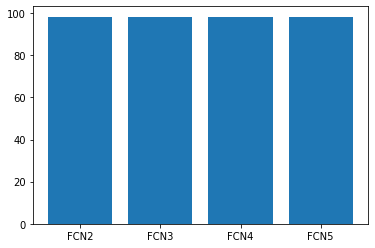

In [23]:
x = np.arange(4)
fcns = ['FCN2','FCN3','FCN4','FCN5']
accuracies = [acc*100 for acc in accuracy] # %

plt.bar(x, accuracies)
plt.xticks(x, fcns)
# plt.ylim((95,100))
plt.show()

## 모형의 저장

- 트레이닝이 끝난 모형은 save 메서드로 가중치와 함께 hdf5 형식으로 저장
- load 명령으로 불러 사용

In [17]:
fcn3.save('fcn3_best.hdf5')

In [18]:
from keras.models import load_model

model = load_model('fcn3_best.hdf5')
model.evaluate(X_test, y_test, batch_size=100)

100/100 [==============================] - 0s 3ms/step - loss: 0.0609 - accuracy: 0.9846


[0.06088050454854965, 0.9846000075340271]

---